### Preamble

Ok peeking is bad. But let's try to build some intuition around *why* peeking is bad, and what we can do about it.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

Someone arrives on our homepage. They either take a conversion action or they don't. From our past observations we know that roughly 2 of every 100 visitors take a conversion action on our homepage. 

Here's what that might look like:

In [2]:
visitors_100 = np.random.choice([1, 0], size=100, p=[0.02, 0.98])
print(visitors_100)
print("\nNumber of conversions: {}".format(visitors_100.sum()))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Number of conversions: 0


An easier way to get the number of conversions would be to call the scipy random variables (rvs) method:

In [3]:
stats.binom.rvs(n=100, p=0.02)

1

Okay but we're responsible statisticians, so we know that we could be getting an abnormally high or low number of conversions in the 100 visitors we're examining due to chance. So let's repeat our "experiment" 10 times.

In [4]:
v100_times_10 = stats.binom.rvs(n=100, p=0.02, size=10)
print(v100_times_10)
print("\nAverage number of conversions: {}".format(np.mean(v100_times_10)))

[1 2 1 6 5 2 1 2 2 3]

Average number of conversions: 2.5


So we have greater confidence in our estimation of our conversion rate, but we need more traffic to do it.

A standard error calculation gives us the amount of deviation from the average conversion rate we can expect to see if our experiment is repeated multiple times.

In [5]:
def std_error(p, n): return math.sqrt(p * (1 - p) / n)

In [6]:
std_error(0.02, 100)

0.014

How can we think intuitively our standard error metric? We might think of it as "the amount of variation we would expect to see within one standard deviation of our average conversion rate". One standard deviation contains 68% of the outcomes we would expect to see in our data, so 68% of the time our conversion rate should lie between 0.02 - 0.014 = 0.006 and 0.02 + 0.014 = 0.034.

In [7]:
se_1_below_cnv = 0.02 + std_error(0.02, 100)
se_1_above_cnv = 0.02 - std_error(0.02, 100)

In [8]:
v100_t10_cnv = np.float32(v100_times_10) / len(v100_times_10)
v100_t10_cnv

array([ 0.1       ,  0.2       ,  0.1       ,  0.60000002,  0.5       ,
        0.2       ,  0.1       ,  0.2       ,  0.2       ,  0.30000001], dtype=float32)

In [9]:
v100_t10_blw_mean_plus_se = v100_times_10 < (0.02 + std_error(0.02, 100))
v100_t10_blw_mean_plus_se

array([False, False, False, False, False, False, False, False, False, False], dtype=bool)

In [11]:
v100_t10_abv_mean_plus_se = v100_times_10 < (0.02 + std_error(0.02, 100))
v100_t10_abv_mean_plus_se

array([False, False, False, False, False, False, False, False, False, False], dtype=bool)

In [ ]:
pd.DataFrame({
    "Number of Conversions": visitors_100_times_10,
    "Conversion Rate": visitors_100_times_10_cnv,
    "Within Standard Error": visitors_100_times_10[visitors_100_times_10[]]
}, index=["Trial {}".format(i + 1) for i in range(10)])[[
    "Number of Conversions",
    "Conversion Rate"
]].T

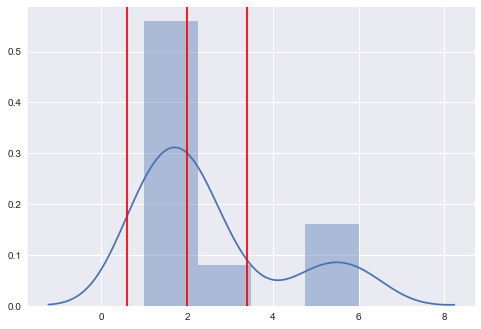

In [12]:
_ = sns.distplot(v100_times_10)
_ = plt.axvline((0.02 * 100), color="r")
_ = plt.axvline((0.02 - std_error(0.02, 100)) * 100, color="r")
_ = plt.axvline((0.02 + std_error(0.02, 100)) * 100, color="r")

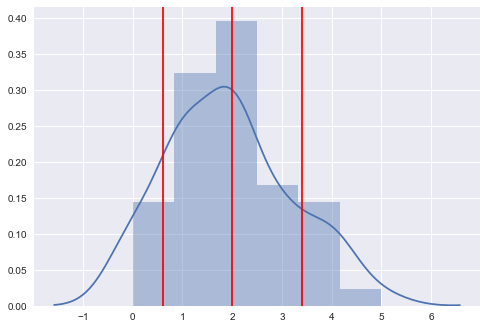

In [13]:
v100_times_100 = stats.binom.rvs(n=100, p=0.02, size=100)
_ = sns.distplot(v100_times_100)
_ = plt.axvline((0.02 * 100), color="r")
_ = plt.axvline((0.02 - std_error(0.02, 100)) * 100, color="r")
_ = plt.axvline((0.02 + std_error(0.02, 100)) * 100, color="r")

### The Problem

You have 100 marketers running A/A tests, stopping as soon as they get to p < 0.05 or the test is shown to 10,000 visitors. 

How many of them will stop early? 5? 10? 20? 30?